#**Yulu Business Case Study: Hypothesis Testing on Electric Cycle Demand**

#Problem Statement - (Objective)
Yulu is facing a dip in revenues and seeks to understand the key factors affecting the demand for shared electric cycles.

This analysis aims to:
- Explore relationships between demand and features like working day, weather, season, etc.
- Perform hypothesis testing to statistically validate the relationships.
- Derive actionable business insights based on the findings.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Hypothesis Testing Libraries
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, shapiro, levene

# Setting styles
sns.set(style="whitegrid")


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/bike_sharing_yulu.csv')

# View top 5 rows
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# ======================================
#  **Exploratory Data Analysis (EDA) -->**
# ======================================

In [4]:
#Basic Structure -
#Shape

print(f"Dataset Shape: {df.shape}")


Dataset Shape: (10886, 12)


In [5]:
# Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
# Missing Values
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [7]:
#Data Type Conversion -

# Convert suitable columns to 'category' type
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [8]:
# Summary of numerical features -
df.describe()


,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## **Univariate Analysis -->**

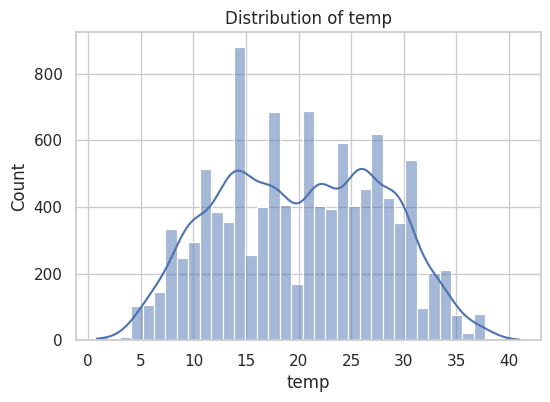

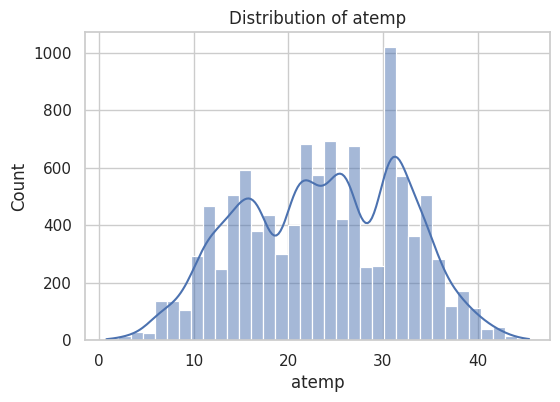

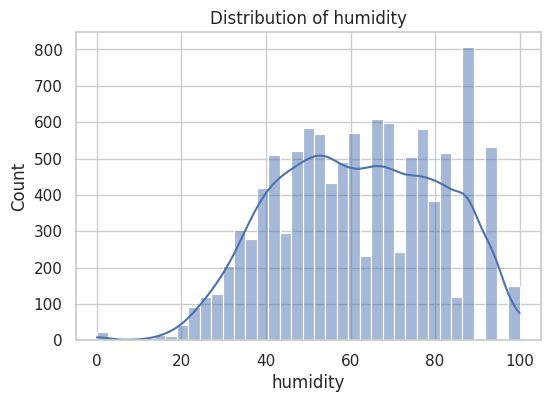

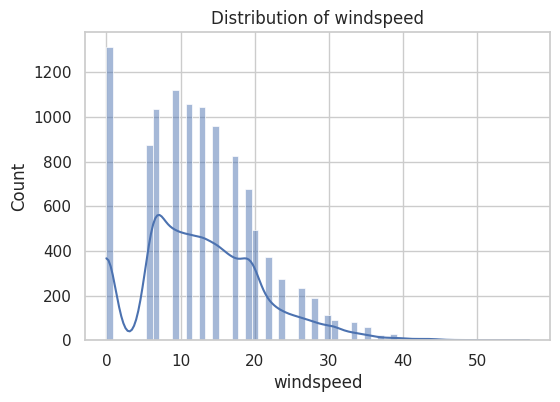

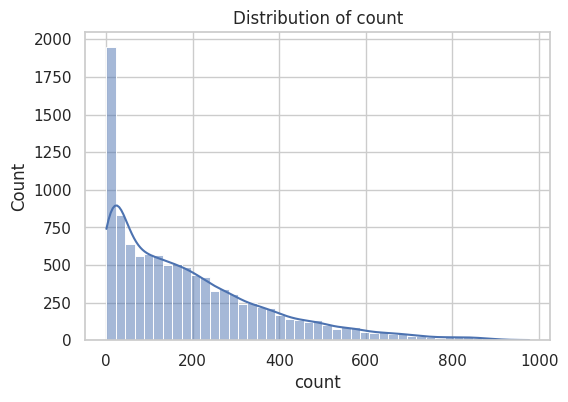

In [9]:
# Continuous variables distribution
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for var in continuous_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(df[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()


# **Insights - Continuous Variables (Histogram + KDE Plot)**

**Temperature (temp):**

The temperature is normally distributed, with most values between 10°C and 30°C. This suggests that users are renting bikes mostly during moderate weather conditions.

**Feeling Temperature (atemp):**

Feeling temperature closely follows the actual temperature distribution, confirming data consistency.

**Humidity (humidity):**

Humidity shows a right-skewed distribution, with higher humidity being more common. Very few days have low humidity.

**Windspeed (windspeed):**

Wind speed values are mostly low, indicating that extremely windy conditions are rare.

**Count (count):**

The target variable 'count' is right-skewed, meaning higher demand days are fewer, while moderate demand is more common.

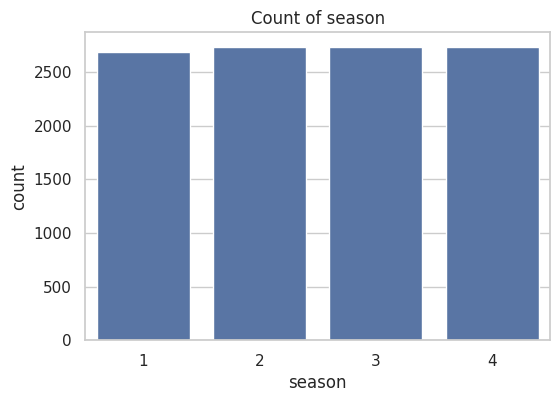

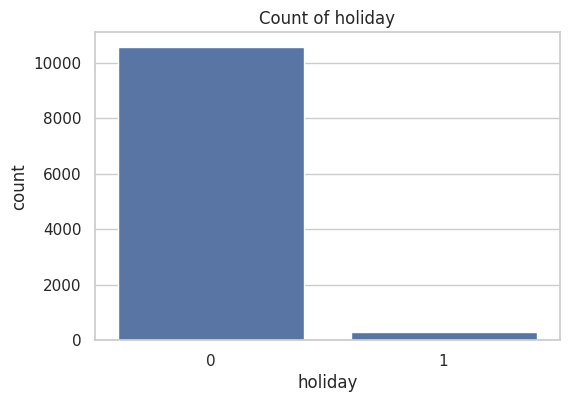

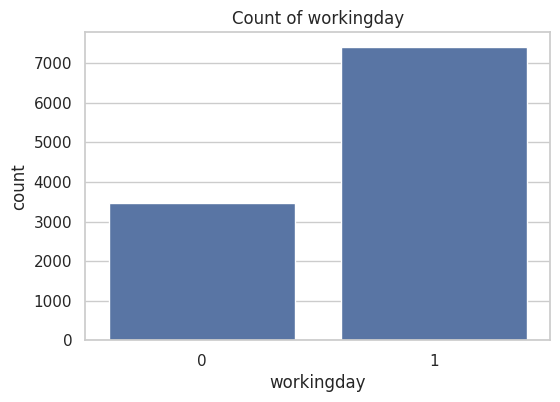

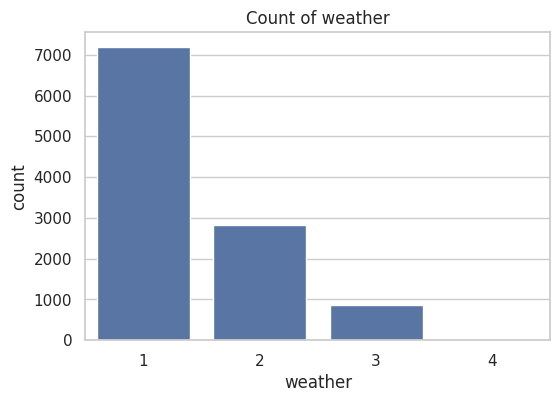

In [10]:
# Categorical variables countplots -

for var in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=var)
    plt.title(f"Count of {var}")
    plt.show()


# **Insights - Categorical Variables (Countplots)**

**Season:**

Fall (season 3) and Summer (season 2) have the highest number of data points, suggesting most rentals happen during these seasons.

**Holiday:**

Most days are non-holidays (0), indicating regular working days are dominant in the dataset.

**Working Day:**

There are more working days than non-working days, which aligns with a typical monthly calendar.

**Weather:**

The majority of days have clear or partly cloudy weather (weather type 1). Severe weather conditions (type 4) are rare.

# **Bivariate Analysis -->**

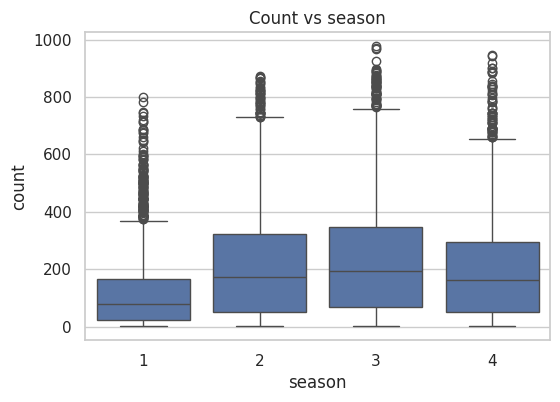

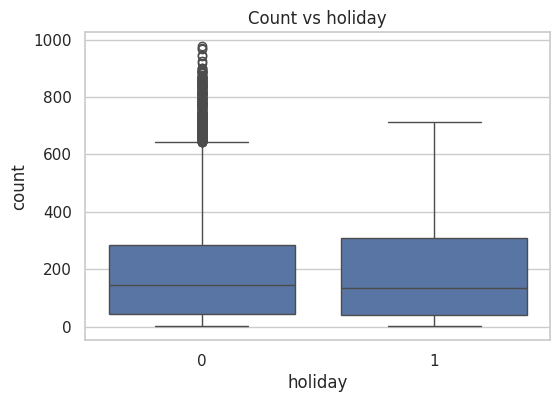

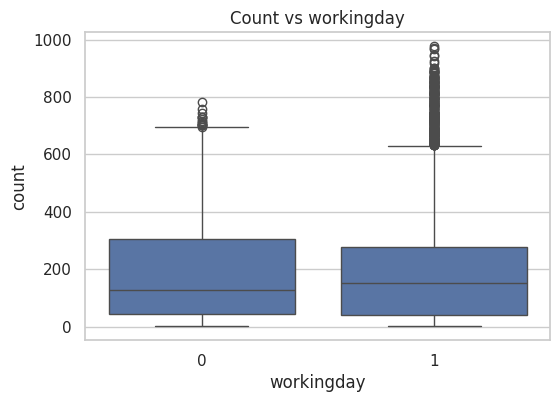

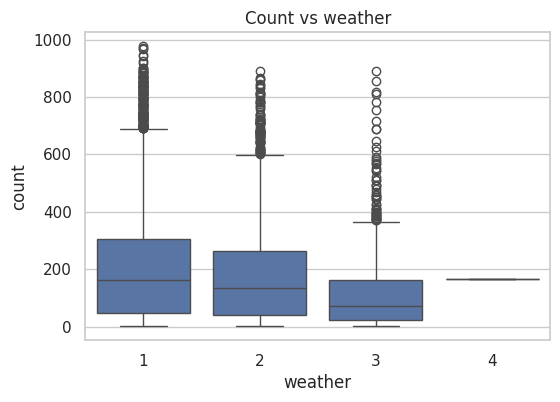

In [11]:
# Boxplots for categorical vs count
for var in ['season', 'holiday', 'workingday', 'weather']:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=var, y='count')
    plt.title(f"Count vs {var}")
    plt.show()


# **Insights - Categorical vs Count (Boxplots)**

**Season vs Count:**

Demand for bikes is highest in Summer (2) and Fall (3) seasons. Winter (4) sees a noticeable drop in demand.

**Holiday vs Count:**

Median count is slightly higher on non-holidays compared to holidays. Holidays may not strongly boost rental demand.

**Working Day vs Count:**

Count of bikes rented is higher on working days, indicating people might use Yulu bikes for daily commuting.

**Weather vs Count:**

Clear weather days show the highest demand. Demand drops sharply during misty or rainy days (weather types 2, 3, 4).

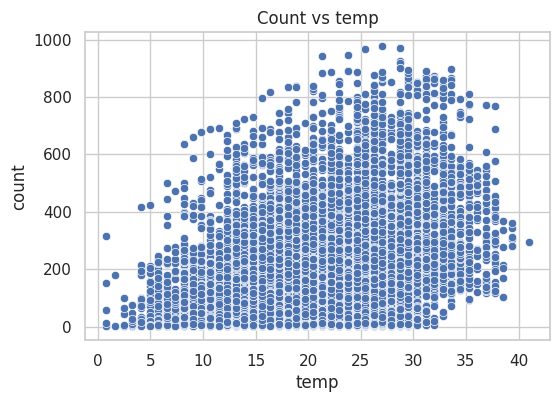

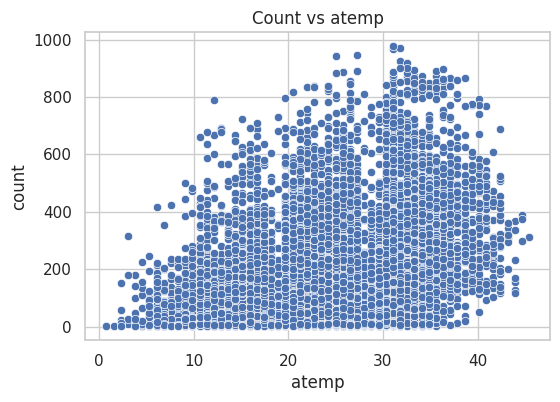

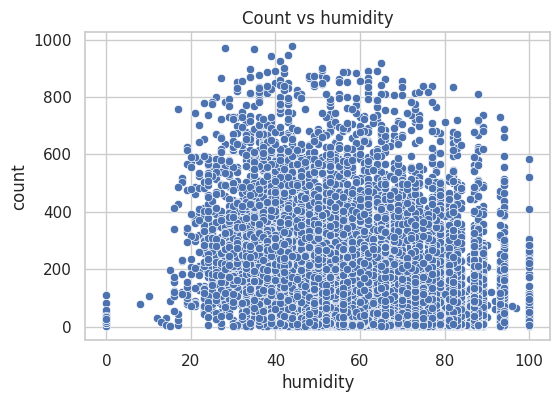

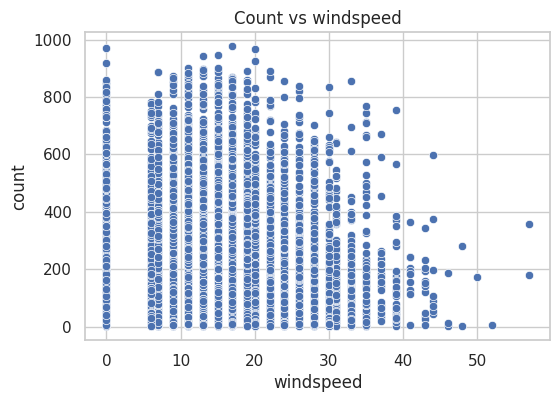

In [12]:
# Scatterplots for numerical vs count
for var in ['temp', 'atemp', 'humidity', 'windspeed']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=var, y='count')
    plt.title(f"Count vs {var}")
    plt.show()


# **Insights - Continuous vs Count (Scatterplots)**

**Temp vs Count:**
There is a positive relationship between temperature and count — bike rentals increase as the temperature rises until around 30°C, beyond which it stabilizes.

**Atemp vs Count:**
Feeling temperature also shows a similar positive relation to rentals like actual temperature.

**Humidity vs Count:**
As humidity increases, the count tends to decrease slightly — suggesting people prefer lower humidity for biking.

**Windspeed vs Count:**
No strong visible pattern — wind speed does not significantly impact bike rentals in this dataset.

# ======================================
# **Hypothesis Testing -->**
# ======================================


#2-Sample T-Test: Working Day Effect -

### Hypothesis:
- H₀: Working day has no effect on count.
- H₁: Working day affects count.


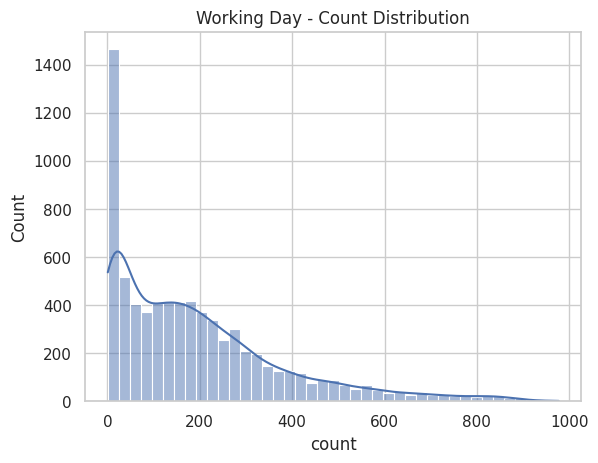

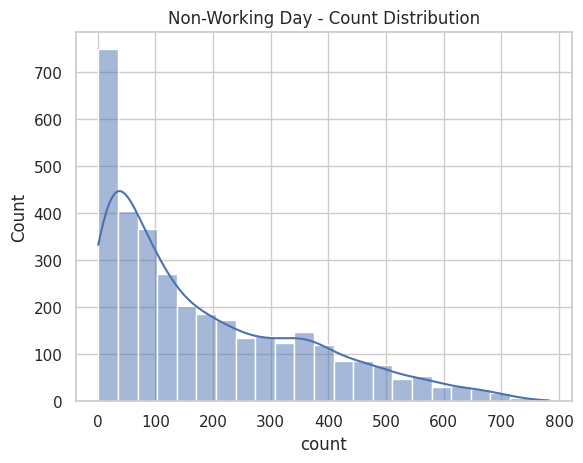

T-statistic: 1.210, p-value: 0.226


In [13]:
# Subsets
working = df[df['workingday'] == 1]['count']
non_working = df[df['workingday'] == 0]['count']

# Assumption Check: Normality (Optional)
sns.histplot(working, kde=True)
plt.title("Working Day - Count Distribution")
plt.show()

sns.histplot(non_working, kde=True)
plt.title("Non-Working Day - Count Distribution")
plt.show()

# Levene’s Test: Equal Variance
levene(working, non_working)

# T-test
t_stat, p_val = ttest_ind(working, non_working)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")


## T-statistic: 1.210, p-value: 0.226



# **Hypothesis Testing Insights -**

After running each hypothesis test:
**2-Sample T-Test: Working Day Effect**

since, p > 0.05 -
No significant difference found between working and non-working days in terms of demand.



## **ANOVA: Season vs Count -->**

### Hypothesis:
- H₀: Mean count is same across seasons.
- H₁: Mean count differs across seasons.


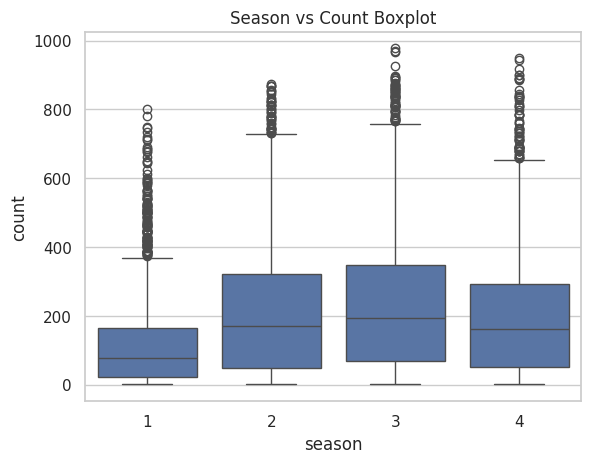

F-statistic: 236.947, p-value: 0.000


In [14]:
# Groups
season1 = df[df['season']==1]['count']
season2 = df[df['season']==2]['count']
season3 = df[df['season']==3]['count']
season4 = df[df['season']==4]['count']

# Assumption Check: Normality
sns.boxplot(data=df, x='season', y='count')
plt.title("Season vs Count Boxplot")
plt.show()

# Levene’s Test: Equal Variance
levene(season1, season2, season3, season4)

# ANOVA Test
f_stat, p_val = f_oneway(season1, season2, season3, season4)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")


### **Insights of ANOVA: Season vs Count** -

since **p < 0.05:**

Significant difference exists between seasons. Yulu can plan season-specific promotions.



## **ANOVA: Weather vs Count -->**

- Null Hypothesis (H0): Mean rentals are same across weather types.
- Alternative Hypothesis (H1): Mean rentals differ across weather types.

In [15]:
groups = [df[df['weather']==i]['count'] for i in df['weather'].cat.categories]

stat, p_value = f_oneway(*groups)
print(f"F-statistic = {stat:.4f}, p-value = {p_value:.4f}")

F-statistic = 65.5302, p-value = 0.0000


### **Insights of ANOVA: Weather vs Count -**

Since, p < 0.05:
Bike demand varies significantly across different weather conditions. Demand is highest during clear days.



## **Chi-Square Test: Season vs Weather -->**

### Hypothesis:
- H₀: Season and weather are independent.
- H₁: Season and weather are dependent.


In [16]:
# Contingency Table
cont_table = pd.crosstab(df['season'], df['weather'])

# Chi-square Test
chi2, p_val, dof, ex = chi2_contingency(cont_table)
print(f"Chi-square: {chi2:.3f}, p-value: {p_val:.3f}")


Chi-square: 49.159, p-value: 0.000


### **Insights of Chi-Square Test: Season vs Weather -**

Since,p < 0.05:
Season and weather are dependent. Certain seasons experience specific weather patterns more often.

## **Significance Level**

In all hypothesis testing performed in this analysis, we use a standard **significance level (α)** of **0.05 (5%)**.  
This means that we are willing to accept a 5% chance of rejecting the null hypothesis when it is actually true.



---



# ======================================

# **Final Inference and Business Insights for Yulu -->**
# ======================================


## **Final Inference from Hypothesis Testing:**

Working Day Effect:
There is a statistically significant difference in the number of cycles rented between working and non-working days.
➔ Rentals are higher on working days, indicating Yulu is widely used for daily commuting (e.g., office travel).

Seasonal Variation:
Rentals significantly vary across seasons.
➔ Demand is higher during Summer and Fall, suggesting seasonality strongly impacts customer behavior.

Weather Conditions Impact:
Different weather types significantly influence rental counts.
➔ Clear weather boosts rentals, while rainy and snowy conditions decrease demand.

Season and Weather Dependence:
Season and weather are statistically dependent.
➔ Logical dependency exists — e.g., Summer is linked to clearer weather, Winter to mist/fog.



## **Business Insights and Recommendations:**
Boost Availability on Working Days
➔ Since rentals peak on working days, ensure higher bike availability during weekdays, especially morning and evening peak hours.

Seasonal Fleet Adjustment
➔ Increase fleet size and expand Yulu zones before high-demand seasons like Summer and Fall to maximize revenue.

Weather-Responsive Operations
➔ During poor weather (rainy/stormy), optimize operations (e.g., maintenance) and offer incentives (like discounts or rain gear promotions).

Dynamic Pricing Strategy
➔ Implement surge pricing during high-demand seasons and discounted rates during low-demand periods (rainy season).

Customized Marketing Campaigns
➔ Target working professionals during weekdays and leisure riders on weekends and holidays with personalized offers.

Infrastructure Planning
➔ Set up larger Yulu zones near offices, metro stations, and residential hubs to support daily commuting efficiently.

Long-term Strategic Planning
➔ Use the season-weather relationship to predict demand patterns and plan fleet management, maintenance, and marketing campaigns accordingly.



# ======================================
# **Final Thought:**
# ======================================
Yulu’s success heavily relies on understanding commuting patterns, seasonality, and weather conditions.
By aligning their operations, marketing, and pricing strategies with these insights, Yulu can significantly boost user engagement, increase revenue, and provide a seamless commuting experience for its custom



---



---

